In [ ]:
!pip install --upgrade pandas

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1(a)

In [3]:
#the dataset should be placed within a folder named "digit"
digit_data = pd.read_csv('digit/train.csv')

In [4]:
X_train = digit_data.iloc[:,1:]
y_train = digit_data.iloc[:,0]

#converting X_train and y_train from pandas dataframe to lists for later use
X_train_all = X_train.values.tolist()
y_train_all = y_train.values.tolist()

1(b)

In [359]:
def show_digit(d):
    digit = None
    
    #finding the first digit corresponding to the given label
    for index, row in digit_data.iterrows():
        if (row[0] == d):
            digit = row
            break
    
    #processing the datapoint and showing the image using matplotlib 
    digit_arr = digit.to_numpy()
    digit_arr = digit_arr[1:].reshape((28, 28))
    plt.imshow(digit_arr)

    file_name = str(d) + '.png'
    plt.savefig(file_name)
    
    plt.show()
    
    return digit_arr

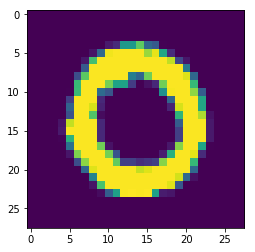

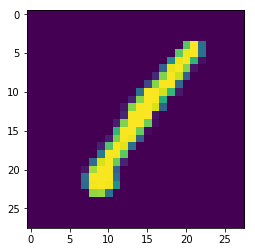

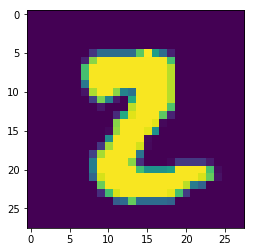

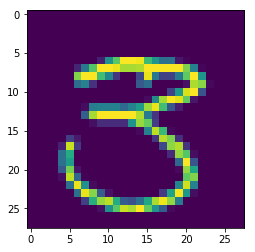

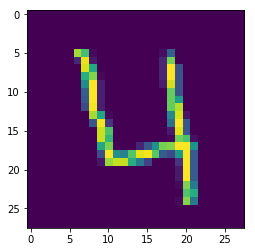

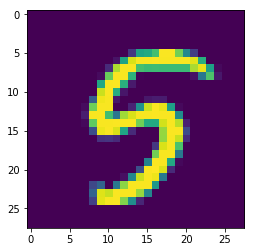

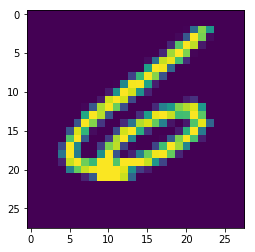

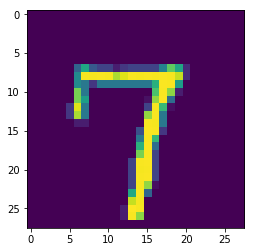

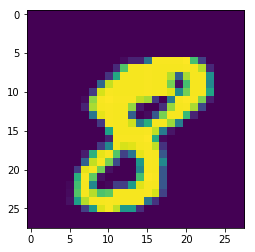

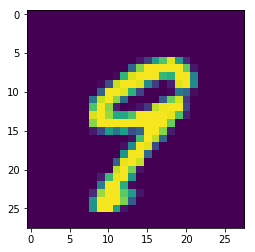

In [360]:
from sklearn.utils import shuffle

sample_digits = []
for i in range(0,10):
    sample_digits.append(show_digit(i))
    #optional: shuffle the dataframe so that we can get different images each time we run this function
    #digit_data = shuffle(digit_data)

1(c)

In [361]:
#counting the occurences of each digit in the dataset
digit_dict = {}
digit_occurence_list = []

for index, row in digit_data.iterrows():
    label = row[0]
    digit_occurence_list.append(label)
    if (label in digit_dict):
        digit_dict[label] += 1
    else:
        digit_dict[label] = 1
        
print(digit_dict)

{1: 4684, 0: 4132, 4: 4072, 7: 4401, 3: 4351, 5: 3795, 8: 4063, 9: 4188, 2: 4177, 6: 4137}


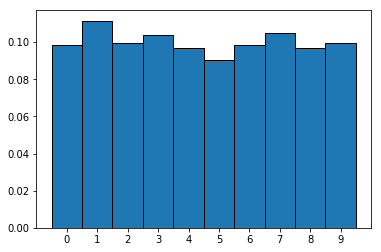

In [362]:
#plotting a histogram
plt.hist(digit_occurence_list, density=True, bins=np.arange(11)-0.5, edgecolor='black')
plt.xticks([i for i in range(10)])
plt.show()

1(d)

In [363]:
from sklearn.neighbors import NearestNeighbors

In [364]:
#a function to display a digit given its index in the dataset
def show_digit_by_index(idx):
    digit = X_train.iloc[idx]
    digit_arr = digit.to_numpy()
    digit_arr = digit_arr.reshape((28, 28))
    plt.imshow(digit_arr)
    plt.show()

In [365]:
#get the 2 nearest neighbors
neighbor = NearestNeighbors(n_neighbors=2)
neighbor.fit(X_train)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=2, p=2, radius=1.0)

Digit 0
Nearst neighbor (itself)
Distance: 0.0
Index: 1
Image:


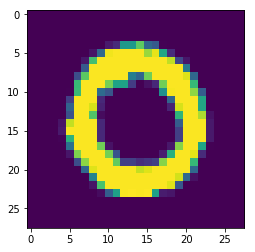

2nd Nearst neighbor
Distance: 1046.5954328201515
Index: 12950
Image:


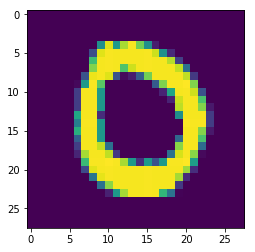

Digit 1
Nearst neighbor (itself)
Distance: 0.0
Index: 0
Image:


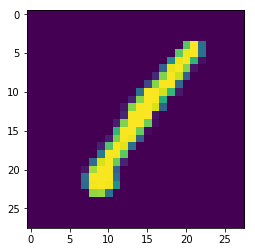

2nd Nearst neighbor
Distance: 489.67948701165744
Index: 29704
Image:


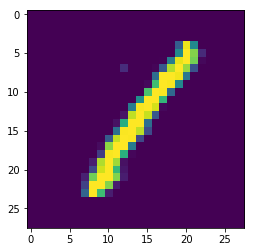

Digit 2
Nearst neighbor (itself)
Distance: 0.0
Index: 16
Image:


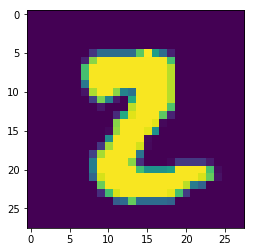

2nd Nearst neighbor
Distance: 1380.877257398354
Index: 9536
Image:


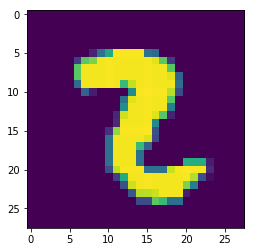

Digit 3
Nearst neighbor (itself)
Distance: 0.0
Index: 7
Image:


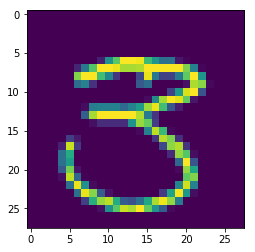

2nd Nearst neighbor
Distance: 1832.6649993929605
Index: 8981
Image:


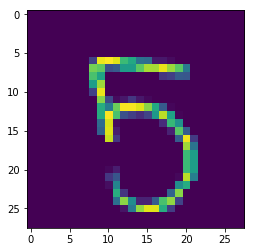

Digit 4
Nearst neighbor (itself)
Distance: 0.0
Index: 3
Image:


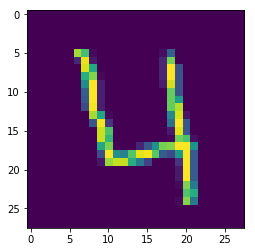

2nd Nearst neighbor
Distance: 1356.8809822530493
Index: 14787
Image:


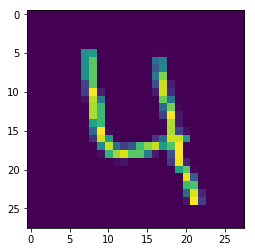

Digit 5
Nearst neighbor (itself)
Distance: 0.0
Index: 8
Image:


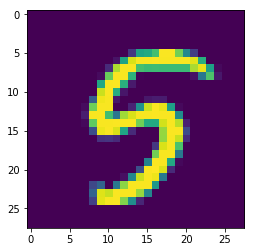

2nd Nearst neighbor
Distance: 1066.3676664265472
Index: 30073
Image:


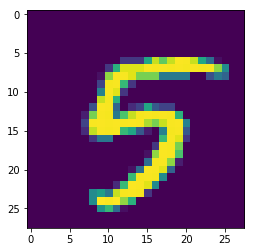

Digit 6
Nearst neighbor (itself)
Distance: 0.0
Index: 21
Image:


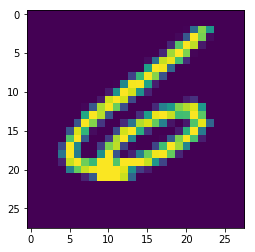

2nd Nearst neighbor
Distance: 1446.5113203843239
Index: 16240
Image:


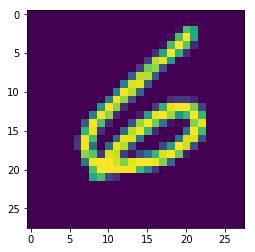

Digit 7
Nearst neighbor (itself)
Distance: 0.0
Index: 6
Image:


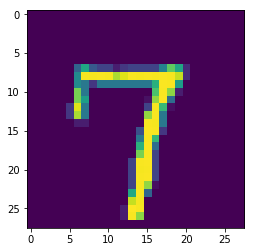

2nd Nearst neighbor
Distance: 863.5010133172977
Index: 15275
Image:


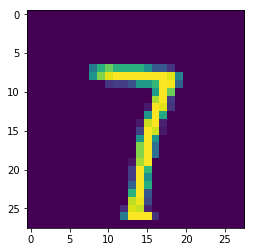

Digit 8
Nearst neighbor (itself)
Distance: 0.0
Index: 10
Image:


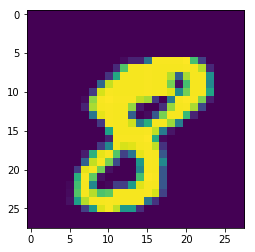

2nd Nearst neighbor
Distance: 1593.7775879965184
Index: 32586
Image:


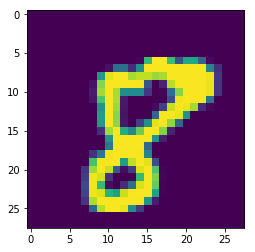

Digit 9
Nearst neighbor (itself)
Distance: 0.0
Index: 11
Image:


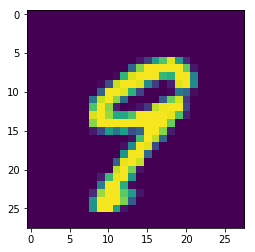

2nd Nearst neighbor
Distance: 910.5767403135224
Index: 35742
Image:


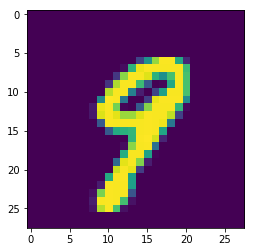

In [366]:
for i in range(0,10):
    digit = sample_digits[i]
    neighbors = neighbor.kneighbors([digit.flatten()])  ##using digit.flatten() to transfrom 2d array into 1d
    print('Digit', i)
    print('Nearst neighbor (itself)')
    print('Distance:', neighbors[0][0][0])
    print('Index:', neighbors[1][0][0])
    print('Image:')
    show_digit_by_index(neighbors[1][0][0])
    print('2nd Nearst neighbor')
    print('Distance:', neighbors[0][0][1])
    print('Index:', neighbors[1][0][1])
    print('Image:')
    show_digit_by_index(neighbors[1][0][1])
    print('=========')

1(e)

In [316]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels

In [317]:
#a function to find all datapoints in the dataset given the label
def find_by_digit(d):
    result = []
    for index, row in digit_data.iterrows():
        if (row[0] == d):
            digit = row
            digit_arr = digit.to_numpy()
            result.append(digit_arr[1:])
    return result

In [318]:
#getting all 0 digits and 1 digits in the dataset
digit_zero = find_by_digit(0)
digit_one = find_by_digit(1)

In [328]:
#calculating pairwise distances
gen_zero = pairwise_distances(digit_zero)
gen_zero = gen_zero.flatten()
gen_one = pairwise_distances(digit_one)
gen_one = gen_one.flatten()
genuine = np.append(gen_one, gen_zero)

imposter = pairwise_distances(digit_zero, digit_one)
imposter = imposter.flatten()
imposter = np.repeat(imposter, 2)        ##repeat the array so that we get 2 * distance pairs

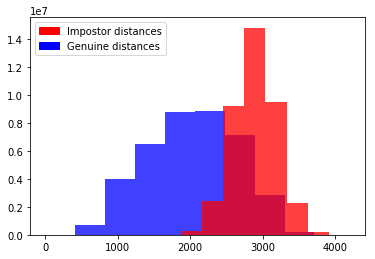

In [352]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

ax.hist(genuine, color='blue', alpha=0.75)
ax.hist(imposter, color='red', alpha=0.75)

red_legend = mpatches.Patch(color='red', label='Impostor distances')        ##adding legends
blue_legend = mpatches.Patch(color='blue', label='Genuine distances')
plt.legend(handles=[red_legend, blue_legend])

plt.show()

1(f)

In [331]:
#sorting the distance lists so that we can get the max value (which is around 4200)
genuine = np.sort(genuine)
imposter = np.sort(imposter)

print(genuine[-1], imposter[-1])        

4127.248356956485 4202.085553626913


In [386]:
#calculating FPR, TPR given 88 different thresholds (0, 50, 100, ..., 4300)
fpr = []
tpr = []
thresholds = []

for i in range(0, 4301, 50):           ##based on the max value of ~4200
    thresholds.append(i)
    
    tp = (genuine < i).sum()
    fn = len(genuine) - tp
    temp_tpr = tp / (tp + fn)
    tpr.append(temp_tpr)
    
    fp = (imposter < i).sum()
    tn = len(imposter) - fp
    temp_fpr = fp / (fp + tn)
    fpr.append(temp_fpr)
    
    if (temp_fnr == temp_fpr):
        eer = temp_fnr

In [388]:
#getting the list of false negative rates
fnr = []
for value in tpr:
    fnr.append(1 - value)

#calculating the approximate equal error rate
#(as we are unable to calculate the FNR and FPR for all thresholds (=infinite amount of thresholds), 
#we can only approximate the EER in this way)
fnr = np.asarray(fnr)
fpr = np.asarray(fpr)
eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print('Equal error rate:', eer)

Equal error rate: 0.2013620960895074


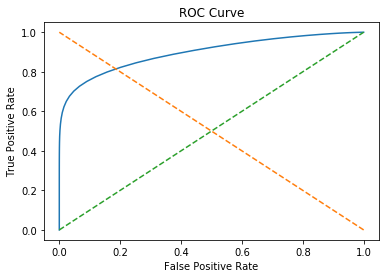

In [390]:
#plotting the ROC curve base on FPR, TPR at different thresholds
fig, ax = plt.subplots()

ax.plot(fpr, tpr)
ax.plot([1,0],[0,1], '--')
ax.plot([0,1],[0,1], '--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

1(g)

In [23]:
#function for getting the labels of the neighbors of a given point and predicting the label of that point
def predict_label(neighbors):
    votes_dict = {}
    for neighbor in neighbors:
        temp_label = neighbor
        #temp_label = neighbor[1]
        if temp_label in votes_dict:
            votes_dict[temp_label] += 1
        else:
            votes_dict[temp_label] = 1
    
    sorted_dict = sorted(votes_dict.items(), key = lambda x:x[1], reverse=True)        ##sort by votes (most to fewest)
    return sorted_dict[0][0]

In [33]:
#main knn function
from scipy.spatial.distance import cdist

def knn(train, labels, test, k):
    predictions = []
    
    #getting the distances between each point in test set and each point in training set
    distances = cdist(test, train, 'euclidean')
    
    for d in distances:                     ##for each point in the test set:
        neighbors = []
        index_list = np.argsort(d)          ##argsorting the distances
        index_list = index_list[:k]         ##retaining the first k neighbors
        
        for i in index_list:
            neighbors.append(labels[i])     ##getting the label of each neighbor
        
        result = predict_label(neighbors)   ##predicting the label of the current point
        predictions.append(result)

    return predictions

1(h)

In [25]:
#randomly splitting the training and test data
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size = 0.5)

In [26]:
k = 5        ##setting k to 5

y_train_list = y_train_new.to_list()
X_train_list = X_train_new.values.tolist()
y_test_list = y_test_new.to_list()
X_test_list = X_test_new.values.tolist()

In [27]:
predicted_y_test = knn(X_train_list, y_train_list, X_test_list, k)

In [21]:
#function for getting the accuracy of the predictions
def get_accuracy(true, predicted):
    if (len(true) != len(predicted)):
        raise ValueError('both lists must have the same length')
    
    length = len(predicted)
    correct = 0
    for i in range(length):
        if (predicted[i] == true[i]):
            correct += 1
    
    print(correct, 'correct predictions out of', length, 'samples')
    print('accuracy:', correct / length)

In [28]:
get_accuracy(y_test_list, predicted_y_test)

20196 correct predictions out of 21000 samples
accuracy: 0.9617142857142857


1(i)

In [30]:
from sklearn.metrics import confusion_matrix

#creating the confusion matrix
matrix = confusion_matrix(y_test_list, predicted_y_test)
pd.DataFrame(matrix, ('true %i'%x for x in range(10)),('predicted %i'%x for x in range(10)))

,predicted 0,predicted 1,predicted 2,predicted 3,predicted 4,predicted 5,predicted 6,predicted 7,predicted 8,predicted 9
true 0,2029,1,1,0,1,5,9,1,0,3
true 1,0,2380,4,1,1,0,2,5,1,0
true 2,12,23,1974,6,2,2,2,42,8,6
true 3,3,10,12,2094,1,21,1,11,20,19
true 4,2,25,0,0,1935,0,8,4,0,57
true 5,8,5,0,37,4,1809,21,3,6,23
true 6,11,3,1,0,2,12,2025,0,2,0
true 7,1,29,3,0,5,0,0,2127,1,32
true 8,6,29,8,33,4,43,9,4,1871,33
true 9,7,5,2,14,18,4,1,36,7,1952


In [31]:
#priting the correct and incorrect predictions for each digit (0-9) to see which one is the most difficult to predict
for i in range(0, 10):
    total = 0
    correct = matrix[i][i]
    for j in range(0, 10):
        total += matrix[i][j]
    
    print('Digit', i, ':', correct, 'correct predictions out of', total, 'total samples; accuracy:', correct / total)

Digit 0 : 2029 correct predictions out of 2050 total samples; accuracy: 0.9897560975609756
Digit 1 : 2380 correct predictions out of 2394 total samples; accuracy: 0.9941520467836257
Digit 2 : 1974 correct predictions out of 2077 total samples; accuracy: 0.9504092441020703
Digit 3 : 2094 correct predictions out of 2192 total samples; accuracy: 0.9552919708029197
Digit 4 : 1935 correct predictions out of 2031 total samples; accuracy: 0.9527326440177253
Digit 5 : 1809 correct predictions out of 1916 total samples; accuracy: 0.9441544885177453
Digit 6 : 2025 correct predictions out of 2056 total samples; accuracy: 0.9849221789883269
Digit 7 : 2127 correct predictions out of 2198 total samples; accuracy: 0.967697907188353
Digit 8 : 1871 correct predictions out of 2040 total samples; accuracy: 0.917156862745098
Digit 9 : 1952 correct predictions out of 2046 total samples; accuracy: 0.9540566959921799


1(j)

In [35]:
#reading the test data
X_test_df = pd.read_csv('data/test.csv')
X_test_all = X_test_df.values.tolist()

In [36]:
predicted_y_test_all = knn(X_train_all, y_train_all, X_test_all, k)

In [37]:
#generate csv output for submission to Kaggle
output = open('submission1.csv', 'w')
output.write('ImageId,Label\n')

for i in range(0, len(predicted_y_test_all)):
    string = str(i+1) + ',' + str(predicted_y_test_all[i])
    output.write(string)
    output.write('\n')
    
output.close()

2(a)

In [307]:
#reading the training and test data
#the dataset should be placed within a folder named "titanic"
titanic_data = pd.read_csv('titanic/train.csv')
X_test = pd.read_csv('titanic/test.csv')

2(b)

In [308]:
#priting the NaN/empty cells in each dataset
print(titanic_data.count())
print(titanic_data.isna().sum())

print(X_test.count())
print(X_test.isna().sum())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [309]:
#dropping 4 columns
X_train = titanic_data
X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

#filling NaN cells within the dataset
X_train['Age'].fillna(X_train['Age'].mean(), inplace = True)
X_train['Fare'].fillna(X_train['Fare'].mean(), inplace = True)
X_train['Embarked'].fillna(method='bfill')

#spliting X and y
y_train = X_train.iloc[:,0]
X_train = X_train.drop('Survived', axis = 1)

In [310]:
#encoding Sex and Embarked from string to numbers
for index, row in X_train.iterrows():
    if (row['Sex'] == 'male'):
        X_train.at[index, 'Sex'] = 1
    else:
        X_train.at[index, 'Sex'] = 0
    
    if (row['Embarked'] == 'C'):
        X_train.at[index, 'Embarked'] = 2
    elif (row['Embarked'] == 'Q'):
        X_train.at[index, 'Embarked'] = 1
    else:
        X_train.at[index, 'Embarked'] = 0

In [ ]:
#predicting using 75% of training data as the training set and 25% as the validation set
from sklearn.linear_model import LogisticRegression

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_train, y_train, test_size = 0.25)

logreg = LogisticRegression().fit(X_train_new, y_train_new)
predictions = logreg.predict(X_test_new)
print('The accuracy score is:', logreg.score(X_test_new, y_test_new))

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


2(c)

In [312]:
#preprocessing test data
X_test = X_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)

X_test['Age'].fillna(X_test['Age'].median(), inplace = True)
X_test['Fare'].fillna(X_test['Fare'].median(), inplace = True)

for index, row in X_test.iterrows():
    if (row['Sex'] == 'male'):
        X_test.at[index, 'Sex'] = 1
    else:
        X_test.at[index, 'Sex'] = 0
        
    if (row['Embarked'] == 'C'):
        X_test.at[index, 'Embarked'] = 2
    elif (row['Embarked'] == 'Q'):
        X_test.at[index, 'Embarked'] = 1
    else:
        X_test.at[index, 'Embarked'] = 0

In [313]:
#predicting on the test data
logreg = LogisticRegression().fit(X_train, y_train)
predictions = logreg.predict(X_test)

/Users/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [314]:
#generate csv output for submission to Kaggle
output = open('submission2.csv', 'w')
output.write('PassengerId,Survived\n')
start = 892

for i in range(0, len(predictions)):
    string = str(start) + ',' + str(predictions[i])
    output.write(string)
    output.write('\n')
    start += 1
    
output.close()